In [ ]:
# Import Important Libraries
import sklearn
from sklearn.datasets import load_breast_cancer # taking included data set from Sklearn http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold

import numpy as np
# import math
import math

import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data set.

In the below code cell, you will load the data from sklearn using the method given. Check import statements and use the given function

In [ ]:

cancer = load_breast_cancer()

In [ ]:
# VERIFY - Print the shape of data and target
print('Q01 - cancer.target.shape: ', cancer.target.shape)
print('Q01 - cancer.data.shape: ', cancer.data.shape)


Q01 - cancer.target.shape:  (569,)
Q01 - cancer.data.shape:  (569, 30)


numpy.ndarray

# Data Pre-Processing
Scale before splitting the data into train and test since we will be using gradient ascent. 
* Use `preprocessing` to scale the data. 
* Assign the target of cancer to variable `y (<np.ndarray>)`.
* Use `train_test_split` to split the data (`75% train` and `25% test`) to `X_train`, `X_test`, `y_train`, `y_test` with `random_state` of 42
* Reshape `y_train` into 2D array `y_2d_train` and `y_test` into 2D array `y_2d_test`

In [ ]:

X_unscaled = cancer.data.copy()
y = cancer.target.copy()

X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y, random_state=42)

#scaling x 
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_2d_train = y_train.reshape(y_train.shape[0],1)
y_2d_test = y_test.reshape(y_test.shape[0],1)

In [ ]:
# VERIFY - Print the shape of X_train and y_2d_train
print('Q02 - X_train.shape: ', X_train.shape)
print('Q02 - y_2d_train.shape: ', y_2d_train.shape)

Q02 - X_train.shape:  (426, 30)
Q02 - y_2d_train.shape:  (426, 1)


In [ ]:
# VERIFY - Printing the names of all the features
print('Q02 - cancer.feature_names: ', cancer.feature_names)

Q02 - cancer.feature_names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Implementing Logistic Regression Using Gradient Ascent

In [ ]:
# Write the sigmoid function
def sigmoid(z):
    result = 1/(1+math.exp(-z))
    return result

In [ ]:
# VERIFY - Sigmoid of 0 should be equal to half
print('Q03 - sigmoid(0): ', sigmoid(0))

Q03 - sigmoid(0):  0.5


In [ ]:
# Append a column of ones to X_train
# ones is a  vector of shape n,1
ones = np.ones((X_train.shape[0],1))
# Append a column of ones in the beginning of X_train an save in variable X_train_1(<np.ndarray>).
X_train_1 = np.hstack((ones,X_train))

In [ ]:
# VERIFY
print('Q04 - X_train_1.shape: ', X_train_1.shape)
print('Q04 - X_train_1: ', X_train_1)

Q04 - X_train_1.shape:  (426, 31)
Q04 - X_train_1:  [[ 1.         -0.34913849 -1.43851335 ... -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 ...  1.43655962  1.14955889
   1.56911143]
 [ 1.         -0.32931176 -0.21507235 ... -0.7237126   0.53496977
  -0.61934827]
 ...
 [ 1.          0.04739597 -0.56293662 ... -1.23262438 -0.68282718
  -1.261137  ]
 [ 1.         -0.04040808  0.09966199 ...  1.08847951  0.48944465
   1.26159953]
 [ 1.         -0.5502381   0.31264011 ... -0.59582424 -0.29911546
  -0.82948141]]


In [ ]:
# Initialize Parameter Vector w to a zero matrix with shape (X_train_1.shape[1],1)
w_init = np.zeros((X_train_1.shape[1],1))

In [ ]:
# VERIFY
print('Q05 - w_init.shape: ', w_init.shape)

Q05 - w_init.shape:  (31, 1)


In [ ]:
# Write the hypothesis function
#I am heavily assuming what you want is the Possibility function, not the actual yhat which is gonna be either 0 or 1, so I am writing that instead.
def hypothesis(X_train_1, w):
    v_sigmoid = np.vectorize(sigmoid)
    y_hat = v_sigmoid(np.dot(X_train_1,w))
    return y_hat

In [ ]:
# Compute y_hat(<np.ndarray>) using X_train_1 and w_init
y_hat_init = hypothesis(X_train_1,w_init)

# Likelihood Function.
Write the code to calculate the log likelihood as discussed in the class.

In [ ]:
# Write the log likelihood function
def likelihood(X_tr, y_tr, w, n):
    y_hat = hypothesis(X_tr,w)
    likelihood = ((y_tr * np.log(y_hat)) + ((1-y_tr) * np.log(1-y_hat))).sum() 
    return likelihood

In [ ]:
# VERIFY - The value should be equal to -295.2806989185367 using X_train_1, y_2d_train, w, X_train_1.shape[0].
print('Q08 - likelihood: ', likelihood(X_train_1, y_2d_train, w_init, X_train_1.shape[0]))

Q08 - likelihood:  -295.2806989185367


In [ ]:
#Maximum Likelihood function with lasso regulization
def lasso_likelihood(X_tr,y_tr, w, n, l):
    y_hat = hypothesis(X_tr,w)
    likelihood = ((y_tr * np.log(y_hat)) + ((1-y_tr) * np.log(1-y_hat))).sum() 
    lasso_likelihood = likelihood * (1/n) - l*(np.absolute(w[1:,:])).sum()
    return lasso_likelihood

def ridge_likelihood(X_tr,y_tr, w, n, l):
    y_hat = hypothesis(X_tr,w)
    likelihood = ((y_tr * np.log(y_hat)) + ((1-y_tr) * np.log(1-y_hat))).sum() 
    ridge_likelihood = likelihood * (1/n) - l*(np.square(w[1:,:])).sum()
    return ridge_likelihood

def derivative_ridge_likelihood(X_tr,y_tr,w, n, l):
    y_hat = hypothesis(X_tr,w)
    zeros = np.zeros((1,w.shape[1]))
    derivative = (np.dot(X_train_1.T, (y_2d_train - y_hat))) * (1/n) - np.vstack((zeros,(2*l*w[1:,:])))
    return derivative

def Gradient_Ascent_Ridge(X_train_1, y_2d_train, learning_rate, l, num_iters):
    # Number of training examples.
    N = X_train_1.shape[0]
    # Initialize w(<np.ndarray>). Zeros vector of shape X_train.shape[1],1
    w = np.zeros((X_train_1.shape[1],1))
    # Initiating list to store values of likelihood(<list>) after few iterations.
    ridge_likelihood_values = []
    for i in range(num_iters):
        y_hat = hypothesis(X_train_1,w)
        gradient = (np.dot(X_train_1.T, (y_2d_train - y_hat)))*(1/N) - (2*l*w)
        # Updating Parameters
        w = w + learning_rate * gradient / N
        if (i % 100) == 0:
            ridge_likelihood_values.append(likelihood(X_train_1,y_2d_train,w,N))
        
    return w, ridge_likelihood_values

#I am going to use sklearn library to do this
def cross_fold(X_unscaled, y, nfold):
    npen = 20
    C_test = np.logspace(-2,2,npen)

    kf = KFold(n_splits=nfold,shuffle=True)
    err_rate = np.zeros((npen,nfold))
    num_nonzerocoef = np.zeros((npen,nfold))
    
    logreg = LogisticRegression(solver='liblinear', penalty='l2',warm_start=True)

    # Loop over the folds in the cross-validation
    for ifold, Ind in enumerate(kf.split(X_unscaled)):        
                
        # Get training and test data
        Itr, Its = Ind
        Xtr = X_unscaled[Itr,:]
        ytr = y[Itr]
        Xts = X_unscaled[Its,:]
        yts = y[Its]
        
        scaler_KFold = preprocessing.StandardScaler()
        Xtr= scaler_KFold.fit_transform(Xtr)
        Xts = scaler_KFold.transform(Xts)
        
        # Loop over penalty levels
        for ipen, c in enumerate(C_test):
            
            # Set the penalty level        
            logreg.C= c
        
            # Fit a model on the training data
            logreg.fit(Xtr, ytr)
        
            # Predict the labels on the test set.
            yhat = logreg.predict(Xts)
            
            # Measure the accuracy
            err_rate[ipen,ifold] = np.mean(yhat != yts)
            num_nonzerocoef[ipen,ifold]=np.sum(abs(logreg.coef_)>0.001)

        print("Fold %d" % ifold)
        
    err_mean = np.mean(err_rate, axis=1)
    num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
    err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)
    plt.errorbar(np.log10(C_test), err_mean, marker='o',yerr=err_se)
    plt.ylim([0.02,0.05])
    plt.grid()
    plt.xlabel('log10(C)')
    plt.ylabel('Error rate')

    imin = np.argmin(err_mean)

    print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
    print("The C value corresponding to minimum error = %12.4e" % (C_test[imin]))


cross_fold(X_unscaled,y,5)
#print(lasso_likelihood(X_train_1,y_2d_train,w_init,X_train_1.shape[0],0.1))
#print(ridge_likelihood(X_train_1,y_2d_train,w_init,X_train_1.shape[0],0.1))
#print(derivative_ridge_likelihood(X_train_1,y_2d_train,w_init,X_train_1.shape[0],0.1))


-0.6931471805599453
-0.6931471805599453
[[ 0.12910798]
 [-0.34474631]
 [-0.20171358]
 [-0.35116594]
 [-0.33338291]
 [-0.17892023]
 [-0.28171086]
 [-0.33045085]
 [-0.37415222]
 [-0.17498941]
 [ 0.01343712]
 [-0.26310996]
 [-0.00856968]
 [-0.25511148]
 [-0.24845598]
 [ 0.02307273]
 [-0.12678715]
 [-0.11841836]
 [-0.19111932]
 [-0.01233897]
 [-0.02511409]
 [-0.36815402]
 [-0.22683885]
 [-0.37174116]
 [-0.34641029]
 [-0.20211322]
 [-0.27815643]
 [-0.32049309]
 [-0.38009885]
 [-0.21383914]
 [-0.14011838]]


# Gradient Ascent

In [ ]:
# Write the gradient ascent function
def Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters):
    # Number of training examples.
    N = X_train_1.shape[0]
    # Initialize w(<np.ndarray>). Zeros vector of shape X_train.shape[1],1
    w = np.zeros((X_train_1.shape[1],1))
    # Initiating list to store values of likelihood(<list>) after few iterations.
    likelihood_values = []
    for i in range(num_iters):
        y_hat = hypothesis(X_train_1,w)
        error = ... #I do not know what type of error you want from me, F1 score? I am not doing this since we do not use this for the function 
        gradient = (np.dot(X_train_1.T, (y_2d_train - y_hat)))
        # Updating Parameters
        w = w + learning_rate * gradient / N
        if (i % 100) == 0:
            likelihood_values.append(likelihood(X_train_1,y_2d_train,w,N))
        
    return w, likelihood_values

In [ ]:
learning_rate = 0.001
num_iters = 50000
# Calculate w and likelihood values using Gradient_Ascent with X_train_1, y_2d_train
w, likelihood_values = Gradient_Ascent(X_train_1,y_2d_train,learning_rate,num_iters)

# Plotting Likelihood v/s Number of Iterations.

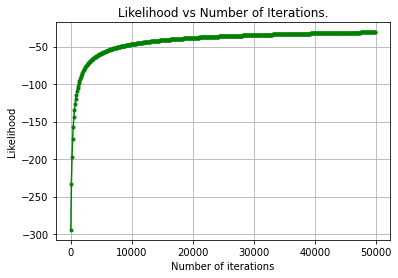

In [ ]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()
plt.show(block=False)

You should see the likelihood increasing as number of Iterations increase.

In [ ]:
#since we are now predicting, instead of the probability, I will produce y_hat

##def predict(X_train_1, w):
##    def check(x):
##        if (x>0):
##            return (1)
##        elif (x == 0):
##            return (np.random.randint(0,2))
##        else:
##            return 0
##    check_v = np.vectorize(check) 
##    y_hat = check_v(np.dot(X_train_1,w))
##    return y_hat

def predict(X_train_1,w):
    v_sigmoid = np.vectorize(sigmoid)
    y_hat = v_sigmoid(np.dot(X_train_1,w))
    return y_hat

In [ ]:
# Preidct y_hat using X_train_1 and w you just calculated
y_hat = predict(X_train_1,w)

In [ ]:
# Write the precision_recall function
def precision_recall(y_hat, y, threshold):  
    # Before finding precision or recall, you have to convert y_hat into a vector of zeros and ones named y_hat_binary using threshold.
    # Values in y_hat > threshold should be equal to 1 and others should be 0.
    y_hat_binary = np.copy(y_hat)
    # Convert values in y_hat_binary to binary values below
    def check(x):
        if (x>threshold):
            return (1)
            ##elif (x == threshold):
            ##    return (np.random.randint(0,2))
        else:
            return (0)
    check_v = np.vectorize(check) 
    
    y_hat_binary = check_v(y_hat_binary)
    #print(y_hat_binary)

    # Calculate false positive and false negative using false difference
    # HINT: false different can be calculated by subtracting hypothesis from actual value
    # HINT: if done correctly, false_pos should be 4 and false_neg should be 2
    false_difference = y_hat_binary - y
    false_pos = (false_difference == 1).sum()
    false_neg = (false_difference == -1).sum()



    all_trues = np.ones((y.shape[0], 1)) 
    # Calculate true positive using all_trues and true difference
    # HINT: true different can be calculated by subtracting sum of hypothesis and actual value from all trues
    # HINT: if done correctly, true_pos should be 266
    true_difference = y_hat_binary + y - all_trues
    true_pos = (true_difference == 1).sum()


    precision = true_pos / (true_pos+false_pos)
    recall = true_pos / (true_pos+false_neg)
    return precision,recall

In [ ]:
# Calculate precision and recall using y_hat, y_2d_train and threshold of 0.5
precision, recall = precision_recall(y_hat,y_2d_train,0.5)
print('Q14 - precision: ', precision)
print('Q14 - recall: ', recall)

Q14 - precision:  0.9851851851851852
Q14 - recall:  0.9925373134328358


In [ ]:
# Write the f_score function
def f_score(precision, recall):
    score = 2* (precision*recall)/(precision+recall)
    return score

# Fitting Model using Sk Learn Library. 

In [ ]:
logreg =  LogisticRegression(C=100000000)

In [ ]:
# Fit the model
# Don't use matrix X_train_1. Instead, use x_train.
logreg.fit(X_train,y_train)

LogisticRegression(C=100000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Find the predicted values on training set using logreg.predict
y_hat_logreg = logreg.predict(X_train)
# Find the accuracy achieved on training set using logreg.score and y_train as type of int
acc_logreg = logreg.score(X_train,y_train) 

print("Q18 - Accuracy on training data = %f" % acc_logreg)

Q18 - Accuracy on training data = 1.000000


<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q19
manual: true
points:
  each: 1
-->

In [ ]:
# Print out all the coefficients
w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

<!-- END QUESTION -->

In [ ]:
# VERIFY - Compare the parameters computed by logreg model and gradient ascent. They should be nearly same.
print('Q19 - w_logreg: ', w_logreg)
print('Q19 - intercept_logreg: ', intercept_logreg)

Q19 - w_logreg:  [[  22.20354939  -21.44100978   59.16839412    1.2115979   -42.19697283
   360.63887807 -106.3087013  -289.5216613    96.40386209 -194.28626767
  -369.06429646   58.89312117   67.54079586 -215.07334324  -61.69597975
   -88.60037689   61.79893125 -123.45994937  151.76554756  248.38541764
  -133.50997508 -157.07474867   87.07454329 -136.95118586  102.92812654
    94.88367681 -274.99164994  -62.66130469 -268.3824686     8.12051949]]
Q19 - intercept_logreg:  [-44.50369833]


# Performance Metrics:


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
# Find Precision, recall and fscore using precision_recall_fscore_support nethod of sklearn
# Using y_train and y_hat_logreg
temp = precision_recall_fscore_support(y_train,y_hat_logreg)
prec = temp[0]
recal = temp[1]
fscore = temp[2]

In [ ]:
# VERIFY
print('Q20 - prec: ', prec)
print('Q20 - recal: ', recal)
print('Q20 - fscore: ', fscore)

Q20 - prec:  [1. 1.]
Q20 - recal:  [1. 1.]
Q20 - fscore:  [1. 1.]
